<a href="https://colab.research.google.com/github/SergeyChernyaev/pyda_homeworks/blob/master/netology_clas_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи классификации и кластеризации

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)
* [PythonTalk на Кью](https://yandex.ru/q/loves/pythontalk/)

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [ ]:
len(y_test)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]

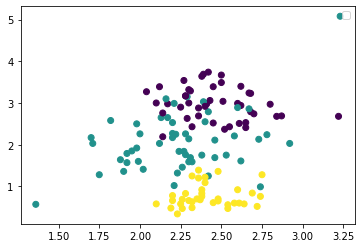

In [ ]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=y_train)
plt.legend()
plt.show()


In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

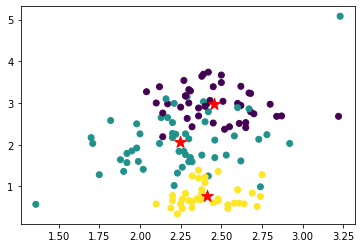

In [ ]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')


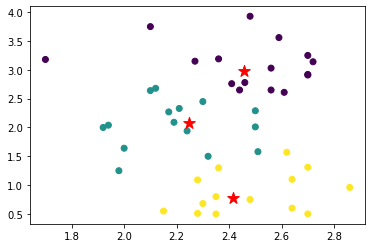

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lda_small.predict(small_test))
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [ ]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [ ]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [ ]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[9.71400853e-01, 1.37503820e-02, 1.48487651e-02],
       [9.88430124e-01, 1.49092717e-03, 1.00789486e-02],
       [4.93090228e-02, 2.31732668e-01, 7.18958309e-01],
       [9.96832707e-01, 1.27304805e-03, 1.89424528e-03],
       [6.55348795e-02, 9.05737651e-01, 2.87274693e-02],
       [9.93925100e-01, 3.58539184e-04, 5.71636098e-03],
       [1.45221444e-02, 9.85066433e-01, 4.11422517e-04],
       [5.72665050e-03, 3.38370016e-04, 9.93934979e-01],
       [4.56442762e-02, 9.54074923e-01, 2.80801234e-04],
       [1.58598776e-01, 1.49892814e-02, 8.26411942e-01],
       [4.87560512e-01, 5.10439911e-01, 1.99957654e-03],
       [1.17356186e-04, 2.31706727e-04, 9.99650937e-01],
       [9.92448689e-01, 3.71459389e-03, 3.83671718e-03],
       [6.22456126e-02, 7.99272171e-01, 1.38482216e-01],
       [9.93080016e-01, 1.23646200e-05, 6.90761902e-03],
       [3.06831509e-04, 9.99601399e-01, 9.17698661e-05],
       [1.84742240e-03, 9.96910510e-01, 1.24206803e-03],
       [3.12437167e-03, 9.96543

In [ ]:
res = lr.predict_proba(X_test)
sum(res[0])

1.0000000000000002

In [ ]:
accuracy_score(y_test, lr.predict(X_test))

0.9777777777777777

In [ ]:
lr.coef_

array([[ 1.04492005e-03,  1.68308279e-01,  1.28955543e-01,
        -2.45685080e-01, -2.59997387e-02,  1.95644769e-01,
         4.00084311e-01, -8.77613826e-03,  4.80923949e-02,
         2.16658969e-02, -3.99771527e-03,  2.41921169e-01,
         7.08260420e-03],
       [ 2.30103524e-01, -5.05397778e-01, -1.37726985e-01,
         2.38215924e-01,  1.06745894e-02,  1.60173532e-01,
         3.00902074e-01,  8.46291140e-03,  2.78897385e-01,
        -1.08495790e+00,  1.87786804e-01,  3.76443575e-01,
        -6.27546745e-03],
       [-2.31148444e-01,  3.37089499e-01,  8.77144203e-03,
         7.46915678e-03,  1.53251493e-02, -3.55818300e-01,
        -7.00986384e-01,  3.13226865e-04, -3.26989780e-01,
         1.06329200e+00, -1.83789089e-01, -6.18364745e-01,
        -8.07136754e-04]])

## Кластеризация

In [ ]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [ ]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

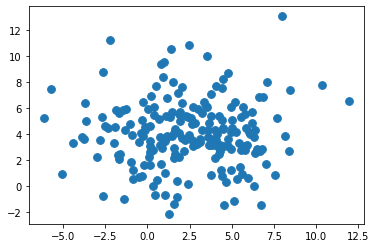

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [ ]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

999
0
9
0


In [ ]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 0.87731003],
       [-1.67512979],
       [ 1.60657855],
       [ 0.14804151],
       [-1.67512979],
       [-0.21659275],
       [-1.31049553],
       [ 1.24194429],
       [-0.94586127],
       [ 0.87731003],
       [ 1.24194429],
       [-1.67512979],
       [ 1.60657855],
       [-1.67512979],
       [-0.94586127],
       [ 0.51267577],
       [-0.21659275],
       [-0.21659275],
       [-0.58122701],
       [ 0.51267577],
       [ 1.24194429],
       [ 0.87731003],
       [ 0.51267577],
       [-0.58122701],
       [ 1.60657855],
       [ 0.51267577],
       [ 0.51267577],
       [-0.21659275],
       [ 1.60657855],
       [-1.31049553],
       [ 0.87731003],
       [-1.67512979],
       [ 0.87731003],
       [ 0.14804151],
       [ 0.14804151],
       [ 0.87731003],
       [-0.94586127],
       [ 1.60657855],
       [ 0.14804151],
       [-1.31049553],
       [ 1.24194429],
       [ 0.87731003],
       [-0.58122701],
       [ 0.87731003],
       [-0.21659275],
       [ 1

In [ ]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.9105946065283859
-1.719434856773258
1.6065785472356562
-1.6751297880164788


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.71714530e+00,  4.58541571e-01],
       [ 9.29174873e-01, -1.37316841e+00],
       [-3.57530952e-01, -2.42316059e+00],
       [ 2.23648422e-01, -1.76787399e-01],
       [ 4.02796608e-01,  3.21643967e-01],
       [ 6.32165322e-01, -1.27290388e+00],
       [ 1.40321220e+00, -4.73750293e-01],
       [ 1.14804646e+00,  4.46526539e-02],
       [ 2.33190341e-01, -2.44431749e-01],
       [ 1.20092325e+00,  6.58170857e-01],
       [ 1.11928415e+00, -3.32327819e-01],
       [-2.58519113e-01,  5.80661088e-03],
       [ 1.38611838e+00, -2.16442093e+00],
       [-5.95589152e-01, -1.38988111e+00],
       [ 1.30544430e+00, -4.57650142e-01],
       [ 6.04862992e-01, -3.43695556e-01],
       [-6.35900899e-01,  8.13999778e-01],
       [-3.46003971e-01,  4.86520036e-01],
       [-1.69021411e-01,  1.00735953e-02],
       [-5.21061270e-01, -9.53473329e-02],
       [-1.35290946e+00,  7.13766538e-01],
       [ 1.11373888e-02,  2.68098358e+00],
       [-1.40605064e+00, -2.97433861e-01],
       [-3.

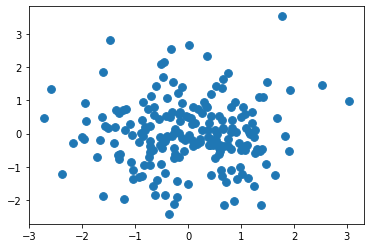

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1,
       2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2,
       0, 1], dtype=int32)

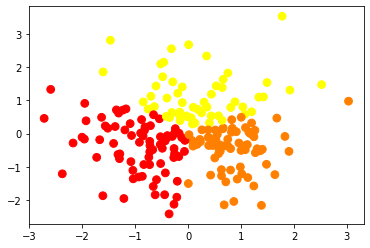

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Text(0, 0.5, 'Инерция')

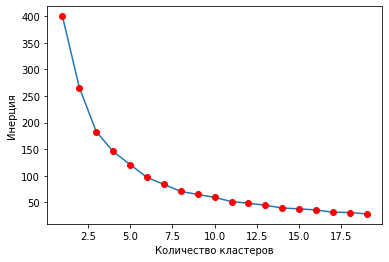

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

Иерархическая кластеризация

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

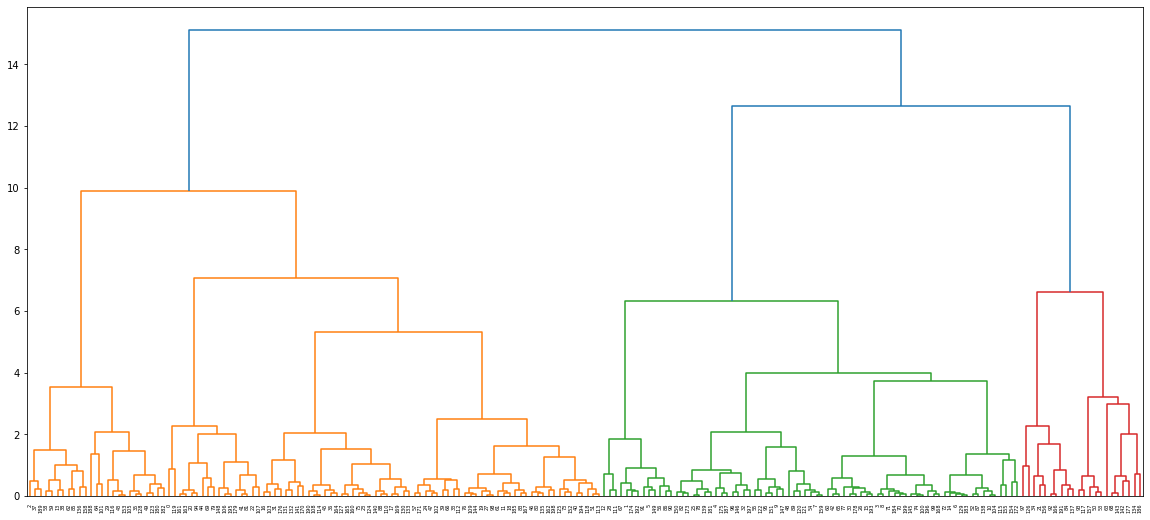

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2,
       0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2,
       0, 2])

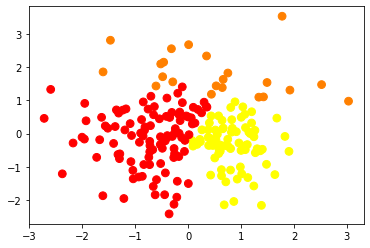

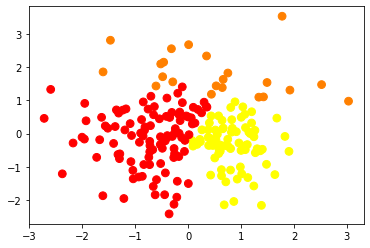

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-6.116517,5.231113,0
1,5.319745,0.554770,2
2,1.284141,-2.125853,0
3,3.106943,3.609123,2
4,3.668821,4.881614,2
...,...,...,...
195,-3.734624,3.636907,0
196,4.059971,3.581496,2
197,4.419691,5.084416,2
198,1.577982,2.912156,0
